# Vehicle Detection and Tracking

This is the project report for the 5th and final Project for Term-1. Here, I will be going through each of the project rubric points as seprate sections and include explanation with example images to better represent a state of the code pipeline

In [37]:
# importing all the libraries that will be required for this project
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
import glob

## 1. Histogram of Oriented Gradients (HOG)

**Explain how (and identify where in your code) you extracted HOG features from the training images. Explain how you settled on your final choice of HOG parameters.**

Once downloading the image dataset for vehicle and non-vehicle images, I found that the data is stuctured in different folders and are of different numbers. Loaded 10 images for vehicle and non-vehicle images to experiment with different HOG features to choose.

In [43]:
# function for rescaling the images to a smaller resolution
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# function to calculate the color histogram features for the given image
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# function for retrieving the hog features
def get_hog_features(img, orient=9, pix_per_cell=8, cell_per_block=8, vis=False, feature_vec=True):
    
    # vis == true will return gradient images also for displaying the result
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features
    
# function for extracting hog features from the list of images
def extract_hog_features(imgs, cspace='RGB', orient=9, pix_per_cell=8, cell_per_block=2, hog_channel=0):
    
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)
            
        # rescale image to lower resolution without loosing any signification structural info
        #feature_image = bin_spatial(feature_image, size=(32,32))
            
        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features

In [27]:
def plotThreeImagesInRow(image1, image2, image3, title1='image1', title2='image2', title3='image3'):
    plt.clf() # clear any previous saved data
    
    # creating layout to place three image sided-by-side with their respective title
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image1, cmap='gray')
    ax1.set_title(title1, fontsize=50)
    ax2.imshow(image2, cmap='gray')
    ax2.set_title(title2, fontsize=50)
    ax3.imshow(image3, cmap='gray')
    ax3.set_title(title3, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    
def plotTwoImageInRow(image1, image2, title1='image1', title2='image2'):
    plt.clf()
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image1, cmap='gray')
    ax1.set_title(title1, fontsize=50)
    ax2.imshow(image2, cmap='gray')
    ax2.set_title(title2, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

In [58]:
# Reading vehicle and non-vehicle images and gettig a sense of the data
v_images_kitti = glob.glob('training_samples/vehicles/KITTI_extracted/*.png')
nv_images_gti = glob.glob('training_samples/non-vehicles/GTI/image*.png')

# creating a list of images to test the hog features on
v_imgs = v_images_kitti[:10]

In [61]:
# test with bin_spactial to find lowest resolution that can work for all our required image processings
test_img_v = mpimg.imread(v_imgs[0])
test_img_v = cv2.cvtColor(test_img_v, cv2.COLOR_RGB2GRAY)
resized_img = bin_spatial(test_img_v)
plotTwoImageInRow(test_img_v, resized_img, 'Original Resolution', 'Scaled Resolution')

TypeError: Invalid dimensions for image data

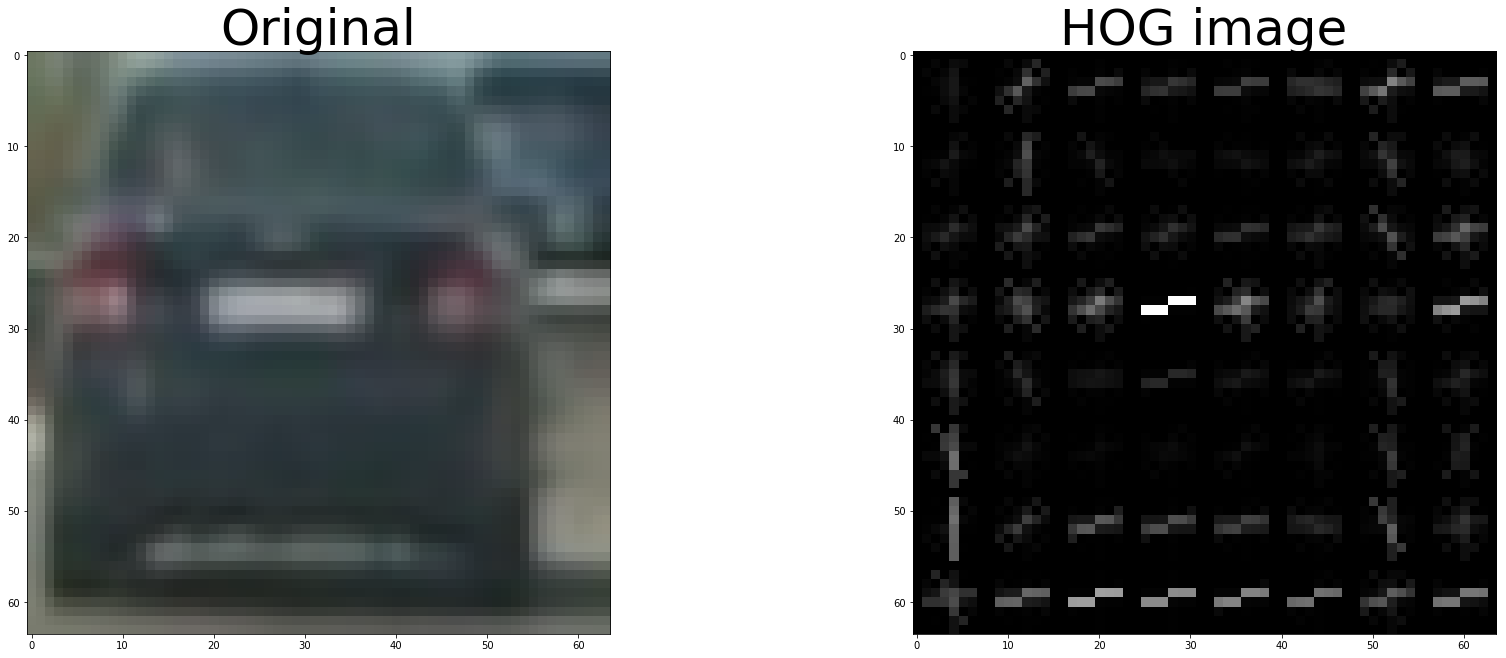

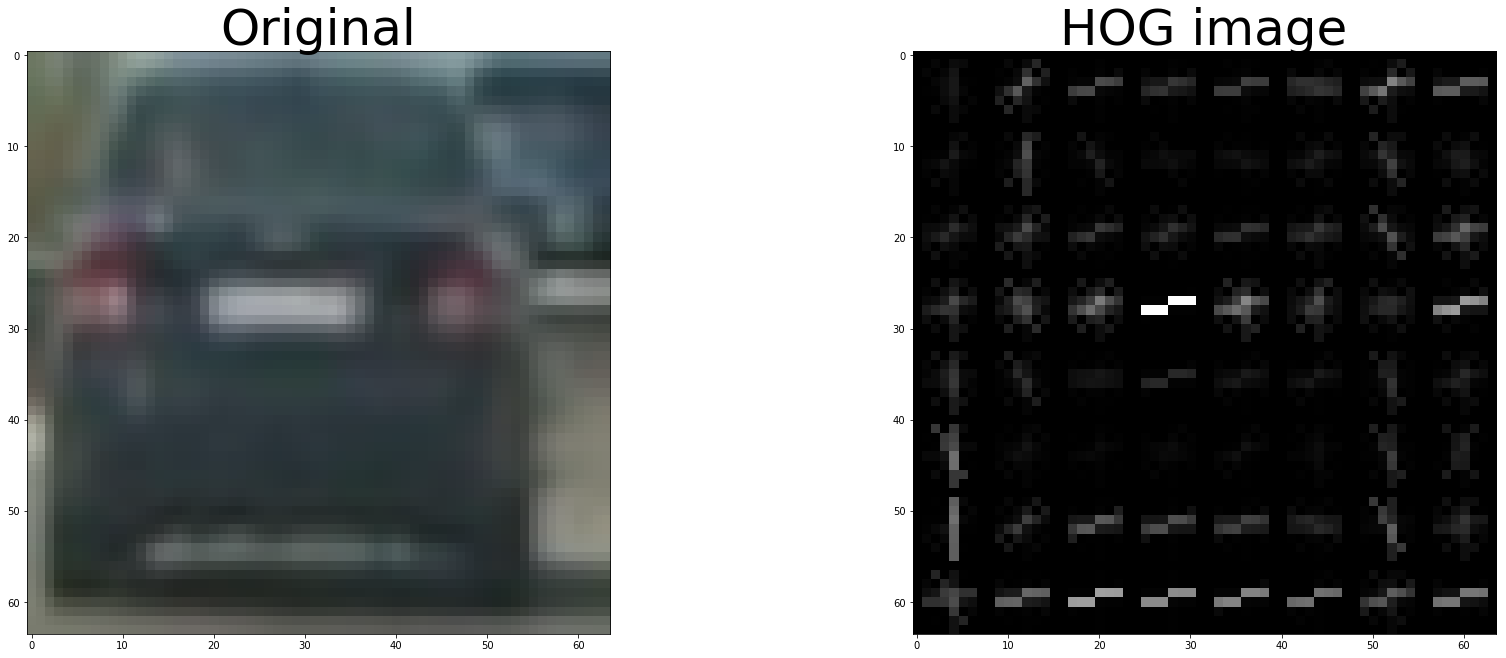

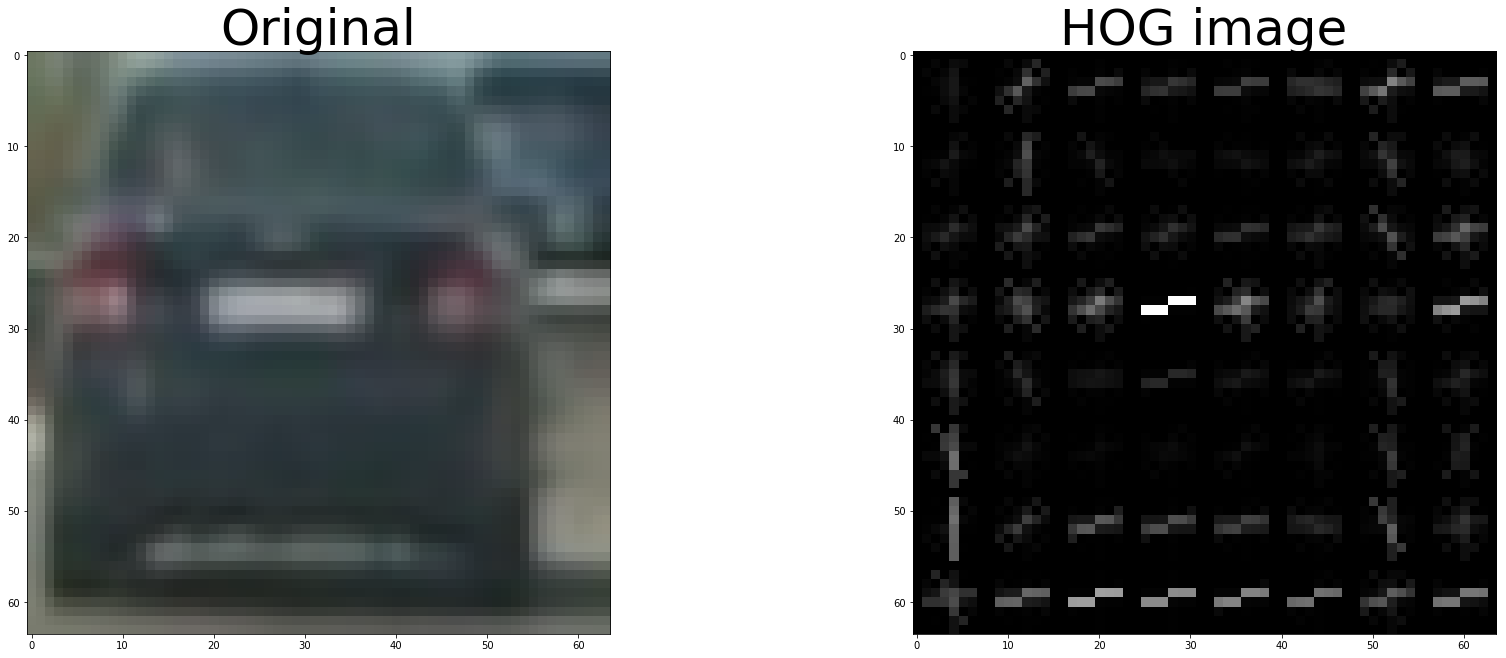

In [55]:
features, hog_image = get_hog_features(v_img[:,:,0], vis=True)
plotTwoImageInRow(v_img, hog_image, 'Original', 'HOG image')
features1, hog_image1 = get_hog_features(v_img[:,:,0], vis=True)
plotTwoImageInRow(v_img, hog_image1, 'Original', 'HOG image')
features2, hog_image2 = get_hog_features(v_img[:,:,0], vis=True)
plotTwoImageInRow(v_img, hog_image2, 'Original', 'HOG image')